In [1]:
import pandas as pd 
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train=pd.read_csv('Downloads/Train.csv')
test=pd.read_csv('Downloads/Test.csv')

In [3]:
train.shape

(8523, 12)

In [4]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [5]:
test.shape

(5681, 11)

In [6]:
test.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

In [7]:
train['source']='train'
test['source']='test'
data=pd.concat([train,test],ignore_index=True)
print(data.shape)

(14204, 13)


In [8]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train


In [9]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,11765.000000,14204.000000,14204.000000,14204.000000,8523.000000
mean,12.792854,0.065953,141.004977,1997.830681,2181.288914
std,4.652502,0.051459,62.086938,8.371664,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.710000,0.027036,94.012000,1987.000000,834.247400
50%,12.600000,0.054021,142.247000,1999.000000,1794.331000
75%,16.750000,0.094037,185.855600,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [10]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
dtype: int64

In [11]:
data['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [12]:
data['Outlet_Establishment_Year'].unique()

array([1999, 2009, 1998, 1987, 1985, 2002, 2007, 1997, 2004], dtype=int64)

In [13]:
data['Outlet_Age']=2018-data['Outlet_Establishment_Year']
data.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,Outlet_Age
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train,19
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train,9


In [14]:
data['Outlet_Size'].unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [15]:
data['Item_Fat_Content'].value_counts()

Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

In [16]:
data['Outlet_Size'].value_counts()

Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

In [17]:
data['Outlet_Size'].mode()[0]

'Medium'

In [18]:
data['Outlet_Size']=data['Outlet_Size'].fillna(data['Outlet_Size'].mode()[0])

In [19]:
data['Item_Weight']=data['Item_Weight'].fillna(data['Item_Weight'].mean())

<AxesSubplot:>

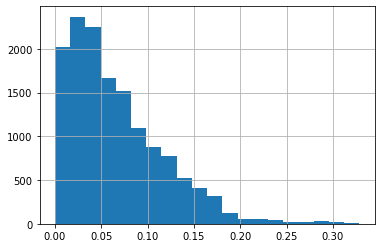

In [20]:
#used to plot histograms
data['Item_Visibility'].hist(bins=20)

In [21]:
#removing outliers
Q1=data['Item_Visibility'].quantile(0.25)

In [22]:
Q3=data['Item_Visibility'].quantile(0.75)

In [23]:
IQR=Q3-Q1

In [24]:
fill_data=data.query('@Q1-1.5*@IQR<=Item_Visibility<=(@Q3+1.5*@IQR)')

In [25]:
fill_data.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,Outlet_Age
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train,19
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train,9


In [26]:
#data after removing outliers
fill_data.shape

(13943, 14)

In [27]:
data=fill_data

In [28]:
data.shape

(13943, 14)

In [29]:
data['Item_Visibility_bins']=pd.cut(data['Item_Visibility'],[0.000,0.065,0.13,0.2],labels=['Low Viz','Viz','High Viz'])

In [30]:
data['Item_Visibility_bins'].value_counts()

Low Viz     7363
Viz         4283
High Viz    1418
Name: Item_Visibility_bins, dtype: int64

In [31]:
data['Item_Visibility_bins']=data['Item_Visibility_bins'].replace(np.nan,'Low Viz',regex=True)

In [32]:
data['Item_Fat_Content']=data['Item_Fat_Content'].replace(['low fat','LF'],'Low Fat')

In [33]:
data['Item_Fat_Content']=data['Item_Fat_Content'].replace('reg','Regular')

In [34]:
le=LabelEncoder()

In [35]:
data['Item_Fat_Content']=le.fit_transform(data['Item_Fat_Content'])

In [36]:
data['Item_Visibility_bins']=le.fit_transform(data['Item_Visibility_bins'])

In [37]:
data['Outlet_Size']=le.fit_transform(data['Outlet_Size'])

In [38]:
data['Outlet_Location_Type']=le.fit_transform(data['Outlet_Location_Type'])

In [39]:
data['Outlet_Type'].unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

In [40]:
data['Item_Identifier'].value_counts()

FDE33    10
FDM12    10
FDY47    10
FDT03    10
FDO01    10
         ..
FDA10     7
FDO33     7
FDZ60     7
NCW54     7
FDG21     7
Name: Item_Identifier, Length: 1559, dtype: int64

In [41]:
data['Item_Type_Combined']=data['Item_Identifier'].apply(lambda x:x[0:2])
data['Item_Type_Combined']=data['Item_Type_Combined'].map({'FD':'Food',
                                                            'NC':'Non-Consumable',
                                                            'DR': 'Drinks'})

In [42]:
data.shape

(13943, 16)

In [43]:
data['Item_Type_Combined'].value_counts()

Food              9991
Non-Consumable    2652
Drinks            1300
Name: Item_Type_Combined, dtype: int64

In [44]:
data=pd.get_dummies(data,columns=['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Outlet_Type','Item_Type_Combined'])

In [45]:
data.dtypes

Item_Identifier                       object
Item_Weight                          float64
Item_Visibility                      float64
Item_Type                             object
Item_MRP                             float64
Outlet_Identifier                     object
Outlet_Establishment_Year              int64
Item_Outlet_Sales                    float64
source                                object
Outlet_Age                             int64
Item_Visibility_bins                   int32
Item_Fat_Content_0                     uint8
Item_Fat_Content_1                     uint8
Outlet_Location_Type_0                 uint8
Outlet_Location_Type_1                 uint8
Outlet_Location_Type_2                 uint8
Outlet_Size_0                          uint8
Outlet_Size_1                          uint8
Outlet_Size_2                          uint8
Outlet_Type_Grocery Store              uint8
Outlet_Type_Supermarket Type1          uint8
Outlet_Type_Supermarket Type2          uint8
Outlet_Typ

In [46]:
import warnings
warnings.filterwarnings('ignore')
data.drop(['Item_Type','Outlet_Establishment_Year'],axis=1,inplace=True)
train=data.loc[data['source']=='train']
test=data.loc[data['source']=='test']
test.drop(['Item_Outlet_Sales','source'],axis=1,inplace=True)
train.drop(['source'],axis=1,inplace=True)
train.to_csv('train_modified.csv',index=False)
test.to_csv('test_modified.csv',index=False)

In [47]:
train2=pd.read_csv('train_modified.csv')
test2=pd.read_csv('test_modified.csv')

In [48]:
train2.dtypes

Item_Identifier                       object
Item_Weight                          float64
Item_Visibility                      float64
Item_MRP                             float64
Outlet_Identifier                     object
Item_Outlet_Sales                    float64
Outlet_Age                             int64
Item_Visibility_bins                   int64
Item_Fat_Content_0                     int64
Item_Fat_Content_1                     int64
Outlet_Location_Type_0                 int64
Outlet_Location_Type_1                 int64
Outlet_Location_Type_2                 int64
Outlet_Size_0                          int64
Outlet_Size_1                          int64
Outlet_Size_2                          int64
Outlet_Type_Grocery Store              int64
Outlet_Type_Supermarket Type1          int64
Outlet_Type_Supermarket Type2          int64
Outlet_Type_Supermarket Type3          int64
Item_Type_Combined_Drinks              int64
Item_Type_Combined_Food                int64
Item_Type_

In [49]:
X_train=train2.drop(['Item_Outlet_Sales','Outlet_Identifier','Item_Identifier'],axis=1)
y_train=train2.Item_Outlet_Sales

In [50]:
X_test=test2.drop(['Outlet_Identifier','Item_Identifier'],axis=1)

In [51]:
X_test

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Age,Item_Visibility_bins,Item_Fat_Content_0,Item_Fat_Content_1,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Size_0,Outlet_Size_1,Outlet_Size_2,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Type_Combined_Drinks,Item_Type_Combined_Food,Item_Type_Combined_Non-Consumable
0,20.750000,0.007565,107.8622,19,1,1,0,1,0,0,0,1,0,0,1,0,0,0,1,0
1,8.300000,0.038428,87.3198,11,1,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0
2,14.600000,0.099575,241.7538,20,2,1,0,0,0,1,0,1,0,1,0,0,0,0,0,1
3,7.315000,0.015388,155.0340,11,1,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0
4,12.792854,0.118599,234.2300,33,2,0,1,0,0,1,0,1,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5563,10.500000,0.013496,141.3154,21,1,0,1,1,0,0,0,0,1,0,1,0,0,0,1,0
5564,7.600000,0.142991,169.1448,9,0,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0
5565,10.000000,0.073529,118.7440,16,2,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1
5566,15.300000,0.000000,214.6218,11,3,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0


In [52]:
X_train.head(2)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Age,Item_Visibility_bins,Item_Fat_Content_0,Item_Fat_Content_1,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Size_0,Outlet_Size_1,Outlet_Size_2,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Type_Combined_Drinks,Item_Type_Combined_Food,Item_Type_Combined_Non-Consumable
0,9.30,0.016047,249.8092,19,1,1,0,1,0,0,0,1,0,0,1,0,0,0,1,0
1,5.92,0.019278,48.2692,9,1,0,1,0,0,1,0,1,0,0,0,1,0,1,0,0


In [53]:
y_train.head(2)

0    3735.1380
1     443.4228
Name: Item_Outlet_Sales, dtype: float64

In [54]:
from sklearn import model_selection
from sklearn.linear_model import LinearRegression

In [55]:
xtrain,xtest,ytrain,ytest=model_selection.train_test_split(X_train,y_train,test_size=0.3,random_state=42)

In [56]:
lr=LinearRegression()

In [57]:
lr.fit(xtrain,ytrain)

LinearRegression()

In [58]:
print(lr.coef_)
lr.intercept_

[-1.93054423e+00 -3.47449893e+02  1.58788136e+01 -3.19310190e+01
 -4.64698319e+00 -1.55426303e+00  1.55426303e+00  1.88969149e+02
  4.83874237e+01 -2.37356573e+02  5.39972452e+02 -3.11545503e+02
 -2.28426949e+02 -1.63452944e+03 -1.26820412e+02 -3.48655405e+02
  2.11000526e+03  9.06454503e+00  3.46403369e+01 -4.37048820e+01]


946.4212171360825

In [59]:
predictions=lr.predict(xtest)
predictions

array([2077.92386202, 3704.93216108, 2961.28180591, ..., 3541.28725867,
       3464.78656382, 1249.59368407])

In [60]:
import math

In [61]:
print(math.sqrt(mean_squared_error(ytest,predictions)))

1126.2352692434754


In [62]:
y_sales_pred=lr.predict(X_test)
y_sales_pred

array([1788.81075495, 1593.90875193, 1845.79649796, ..., 1831.65421972,
       3605.8573969 , 1284.78769015])

In [63]:
test_predictions=pd.DataFrame({
    'Item_Identifier':test2['Item_Identifier'],
    'Outlet_Identifier':test2['Outlet_Identifier'],
    'Item_Outlet_Sales':y_sales_pred
},columns=['Item_Identifier','Outlet_Identifier','Item_Outlet_Sales'])

In [64]:
test_predictions

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1788.810755
1,FDW14,OUT017,1593.908752
2,NCN55,OUT010,1845.796498
3,FDQ58,OUT017,2675.927968
4,FDY38,OUT027,5134.091429
...,...,...,...
5563,FDB58,OUT046,2360.100059
5564,FDD47,OUT018,2419.143609
5565,NCO17,OUT045,1831.654220
5566,FDJ26,OUT017,3605.857397


In [83]:
import matplotlib.pyplot as plt
%matplotlib inline
len(X_train)

8375

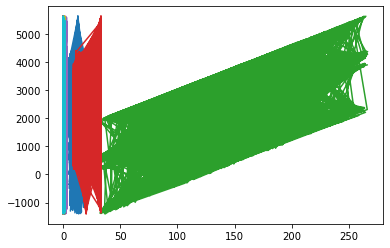

In [80]:
plt.plot(X_test,lr.predict(X_test))
plt.show()